## The contents include:

* 4. Pairwise sequence alignment
* 5. Multiple sequence alignment
* 6. Phylogenetic analysis and tree plotting
* 7. Handling BLAST results
* 8. Pattern finding in a sequence

## 4. Pairwise sequence alignment

When we get two or more novel sequences, we would like to align these sequences with known sequences in order to identify regions of similarity therein. We use pairwise sequence alignment to arrange two sequences.<br>
There are global alignment methods and local alignment technique. The former aims to align every residue in the sequences and are used when sequences are similar and of comparable length (they need not be equal) like the Needleman-Wunsch algorithm. The latter attempts to align regions of high similarity in the sequences, and the Smith-Waterman algorithm is an example of such a technique.

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
install.packages("BiocManager")
BiocManager::install("Biostrings")

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'Biostrings'



package 'Biostrings' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpG4tn6l\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [3]:
library(Biostrings)

In [4]:
## create two sequences
sequence1 <- "GAATTCGGCTA"
sequence2 <- "GATTACCTA"

In [5]:
# Assign penalties for the mismatch and gap getting a scoring matrix for the nucleotides(minus points)
# if not undertsanding the `nucleotideSubstitutionMatrix`, just find `help` file
myScoringMat <- nucleotideSubstitutionMatrix(match = 1, mismatch = -1, baseOnly = TRUE)
myScoringMat

,A,C,G,T
A,1,-1,-1,-1
C,-1,1,-1,-1
G,-1,-1,1,-1
T,-1,-1,-1,1


In [6]:
# Assign gap penalties for the alignments:
gapOpen <- 2
gapExtend <- 1

In [7]:
# the `pairwiseAlignment` function is to perform a global alignment for the sequences:
myAlignment <- pairwiseAlignment(sequence1, sequence2, 
                                 substitutionMatrix = myScoringMat,
                                 gapOpening = gapOpen,
                                 gapExtension = gapExtend, 
                                 type="global", scoreOnly = FALSE)
myAlignment

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: GAATTCGGCTA
subject: GATTAC--CTA
score: 1 

In [8]:
# In the case of protein sequences, we have scoring matrices that are calledsubstitution matrices.
# To see them, use the following function: 
data(package="Biostrings")

In [9]:
# Assign/select one of these substitution matrices to align the protein sequences
# Blocks Substitution Matrix (BLOSUM)
data(BLOSUM62)
subMat <- "BLOSUM62"

In [10]:
# perform the alignment of the protein sequences with the selected substitution matrix:
sequence1 <- "PAWHEAE"
sequence2 <- "HEAGAWGHE"
myAlignProt <- pairwiseAlignment(sequence1, sequence2, 
                                 substitutionMatrix = subMat, gapOpening = gapOpen, gapExtension = gapExtend, 
                                 type="global", scoreOnly = FALSE)
myAlignProt

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: P---AW-HEAE
subject: HEAGAWGHE--
score: 14 

In [11]:
show(myAlignment)

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: GAATTCGGCTA
subject: GATTAC--CTA
score: 1 


In [12]:
show(myAlignProt)

Global PairwiseAlignmentsSingleSubject (1 of 1)
pattern: P---AW-HEAE
subject: HEAGAWGHE--
score: 14 


In [13]:
# try the local alignment
myAlignProt <- pairwiseAlignment(sequence1, sequence2,
                                 substitutionMatrix = subMat, gapOpening = gapOpen, gapExtension = gapExtend,
                                 type="local",scoreOnly = FALSE)
show(myAlignProt)

Local PairwiseAlignmentsSingleSubject (1 of 1)
pattern: [2] AW-HE
subject: [5] AWGHE
score: 25 


Try to use `dotplot` to identify regions of similarity between  the two protein or nucleotide sequences via the vivid visualization.
`dotplot` gives a two-dimensional grid/matrix with two axes, representing the sequences under comparison. Every dot in the grid shows the match in the sequence at that corresponding position. A prominent diagonal line represents a perfect match of a fragment of the sequence. If the slant is along the diagonal and is complete, it depicts the complete similarity of the sequences. You can construct a dot plot using the following command from the `seqinr` package. 


In [14]:
library(seqinr)


Attaching package: 'seqinr'


The following object is masked from 'package:Biostrings':

    translate




In [16]:
myseq <- read.fasta(file = "F:/myBRCA.fasta")
myseq

$AB621825.BRCA1
 [1] "a" "t" "g" "g" "a" "t" "t" "t" "a" "t" "c" "t" "g" "c" "t" "c" "t" "t" "c"
[20] "g" "c" "g" "t" "t" "g" "a" "a" "g" "a" "a" "g" "t" "a" "c" "a" "a" "a" "a"
[39] "t" "g" "t" "c" "a" "t" "t" "a" "a" "t" "g" "c" "t" "a" "t" "g" "c" "a" "g"
[58] "a" "a" "a" "a" "t" "c" "t" "t" "a" "g" "a" "g" "t" "g"
attr(,"name")
[1] "AB621825.BRCA1"
attr(,"Annot")
[1] ">AB621825.BRCA1"
attr(,"class")
[1] "SeqFastadna"

$AF005068.BRCA1
   [1] "a" "t" "g" "a" "g" "c" "c" "t" "a" "c" "a" "a" "g" "a" "a" "a" "g" "t"
  [19] "a" "c" "g" "a" "g" "a" "t" "t" "c" "a" "g" "t" "c" "a" "a" "c" "t" "t"
  [37] "g" "t" "t" "g" "a" "a" "g" "a" "g" "c" "t" "a" "t" "t" "g" "a" "a" "a"
  [55] "a" "c" "c" "a" "t" "t" "t" "g" "t" "g" "c" "t" "t" "t" "t" "c" "a" "g"
  [73] "c" "t" "t" "g" "a" "c" "a" "c" "a" "g" "g" "t" "t" "t" "g" "g" "a" "g"
  [91] "t" "a" "t" "g" "c" "a" "a" "a" "c" "a" "g" "c" "t" "a" "t" "a" "a" "t"
 [109] "t" "t" "t" "g" "c" "a" "a" "a" "a" "a" "a" "g" "g" "a" "a" "a" "a" "t"
 [127

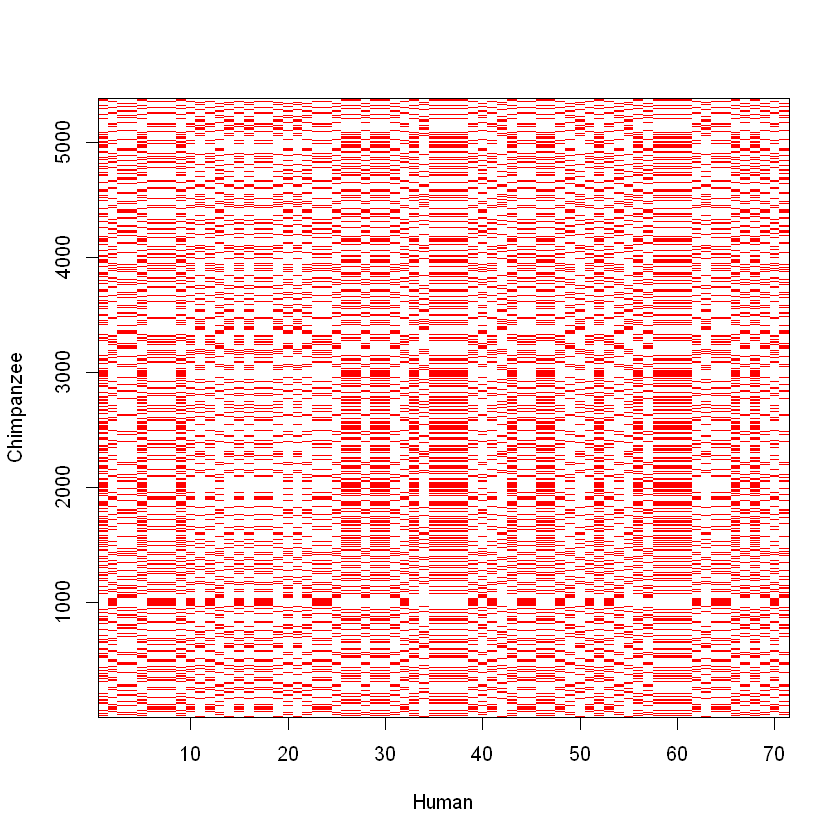

In [18]:
dotPlot(myseq[[1]], myseq[[2]], col=c("white", "red"), xlab="Human", ylab="Chimpanzee")

## 5. Multiple sequence alignment

Last time, what to learn is the alignment between two sequences. Now it is the alignment among many sequences. This helps us to know how similar or dissimilar the sequences are against each other. <br>
A new package, `muscle`, is needed.<br>
I will use the protein sequences of Cytochrome oxidase (COX-2) from five different species(download from [Uniprot](http://www.uniprot.org/).`MUSCLE` algorithms that are very well established and frequently used by bioinformaticians.

In [19]:
BiocManager::install("muscle")

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'muscle'



package 'muscle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpG4tn6l\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'



In [21]:
library(muscle)
library(Biostrings)
library(seqinr)

In [24]:
myseq <- readAAStringSet("F:/data/fastaMSA.fasta")
myseq
myMSA <- muscle(myseq, out=NULL, quiet = FALSE)
myMSA   # muscle(myseq, out=NULL, quiet = FALSE)

  A AAStringSet instance of length 10
     width seq                                              names               
 [1]   227 MAHAAQVGLQDATSPIMEELITF...FMPIVLELIPLKIFEMGPVFTL sp|P00403|COX2_HUMAN
 [2]   227 MAYPMQLGFQDATSPIMEELLHF...FMPIVLELVPLKYFEKWSASML sp|P68530|COX2_BOVIN
 [3]   227 MAYPFQLGLQDATSPIMEELTNF...FMPIVLEMVPLKYFENWSASMI sp|P00406|COX2_RAT
 [4]   231 MNNFFQGYNLLFQHSLFASYMDW...MPIALEVTLLDNFKSWCFGTME sp|P24894|COX2_CAEEL
 [5]   227 MAYPFQLGFQDATSPIMEELLHF...FMPIVLELVPLKHFEEWSASML sp|P48660|COX2_HORSE
 [6]   227 MAYPLQLGFQDATSPVMEELLHF...FMPIVLELVPLKYFESWSASLA sp|Q38PR9|COX2_MAMPR
 [7]   228 MAYPLQLGFQDATSPVMEELLHF...MPIVLELVPLKYFENWSASLAQ sp|Q9TA26|COX2_LOXAF
 [8]   227 MAHAAQVGLQDATSPIMEELITF...FMPIVLELIPLKIFEMGPVFAL sp|P26456|COX2_GORGO
 [9]   227 MAYPFQLGFQDATSPIMEELLHF...FMPIVLELVPLTYFEKWSASML sp|P48890|COX2_FELCA
[10]   227 MAYPFQLGLQDATSPIMEELMNF...FMPIVLEMVPLKYFENWSASMI sp|P00405|COX2_MOUSE

Option -out must have value
Invalid option "out"

MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.


Basic usage

    muscle -in <inputfile> -out <outputfile>

Common options (for a complete list please see the User Guide):

    -in <inputfile>    Input file in FASTA format (default stdin)
    -out <outputfile>  Output alignment in FASTA format (default stdout)
    -diags             Find diagonals (faster for similar sequences)
    -maxiters <n>      Maximum number of iterations (integer, default 16)
    -maxhours <h>      Maximum time to iterate in hours (default no limit)
    -html              Write output in HTML format (default FASTA)
    -msf               Write output in GCG MSF format (default FASTA)
    -clw               Write output in CLUSTALW format (default FASTA)
    -clwstrict         As -clw, with 'CLUSTAL W (1.81)' header
    -log[a] <logfile>  Log

Warning message in file.remove(tempIn, tempOut):
"cannot remove file 'C:\Users\Master\AppData\Local\Temp\RtmpG4tn6l\file4e14356acff.afa', reason 'Permission denied'"


AAMultipleAlignment with 10 rows and 232 columns
      aln                                                   names               
 [1] MAHAAQ---VGLQDATSPIMEELIT...HSFMPIVLELIPLKIFEMGPVFTL- sp|P00403|COX2_HUMAN
 [2] MAYPMQ---LGFQDATSPIMEELLH...HSFMPIVLELVPLKYFEKWSASML- sp|P68530|COX2_BOVIN
 [3] MAYPFQ---LGLQDATSPIMEELTN...HSFMPIVLEMVPLKYFENWSASMI- sp|P00406|COX2_RAT
 [4] MNNFFQGYNLLFQHSLFASYMDWFH...HSFMPIALEVTLLDNFKSWCFGTME sp|P24894|COX2_CAEEL
 [5] MAYPFQ---LGFQDATSPIMEELLH...HSFMPIVLELVPLKHFEEWSASML- sp|P48660|COX2_HORSE
 [6] MAYPLQ---LGFQDATSPVMEELLH...HSFMPIVLELVPLKYFESWSASLA- sp|Q38PR9|COX2_MAMPR
 [7] MAYPLQ---LGFQDATSPVMEELLH...HSFMPIVLELVPLKYFENWSASLAQ sp|Q9TA26|COX2_LOXAF
 [8] MAHAAQ---VGLQDATSPIMEELIT...HSFMPIVLELIPLKIFEMGPVFAL- sp|P26456|COX2_GORGO
 [9] MAYPFQ---LGFQDATSPIMEELLH...HSFMPIVLELVPLTYFEKWSASML- sp|P48890|COX2_FELCA
[10] MAYPFQ---LGLQDATSPIMEELMN...HSFMPIVLEMVPLKYFENWSASMI- sp|P00405|COX2_MOUSE

In [27]:
AAStr <-as(myMSA, "AAStringSet") 
writeXStringSet(AAStr,file="F:/data/msa_aastr.fa")

## 6. Phylogenetic analysis and Tree plotting

Phylogenetic analysis is about finding the evolutionary relationship among species(organisms) based on sequence data. Once we have a set of sequences from different sources, we can use the plots to understand how close or distant they are in terms of molecular evolution. As a result of the mutations during evolution, there emerge differences at the sequence level. These differences can be represented in terms of distance measures (check the See also section at the end of this recipe). These measures can then be used to estimate the evolutionary relations among the species, often represented as phylogenetic trees. This relation is very often depicted in terms of a phylogenetic tree. Now we can look into the various aspects of sequence retrieval, alignment, and analysis. <br>
`ape` package is important here.

In [28]:
BiocManager::install("ape")
library(ape)

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'ape'



package 'ape' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpG4tn6l\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'


Attaching package: 'ape'


The following object is masked from 'package:muscle':

    muscle


The following objects are masked from 'package:seqinr':

    as.alignment, consensus


The following object is masked from 'package:Biostrings':

    complement




In [29]:
# Define the sequences of our interest as a set in terms of IDs:
myset <- c("U15717", "U15718", "U15719", "U15720", "U15721", "U15722")
myset

[1] "U15717" "U15718" "U15719" "U15720" "U15721" "U15722"

In [31]:
# Fetch the sequences that we have defined, and check 'read.GenBnak'
# (connects to the GenBank database, and reads nucleotide sequences using accession numbers given as arguments):
myseqs <- read.GenBank(myset)
myseqs

6 DNA sequences in binary format stored in a list.

All sequences of same length: 1045 

Labels:
U15717
U15718
U15719
U15720
U15721
U15722

Base composition:
    a     c     g     t 
0.267 0.351 0.134 0.248 
(Total: 6.27 kb)

In [32]:
# Compute the distance matrix for the sequences with the 'dist.dna' function, just check 'dist.dna'
mydist <- dist.dna(myseqs)
mydist

             U15717       U15718       U15719       U15720       U15721
U15718 0.0963968720                                                    
U15719 0.0519601191 0.0821667377                                       
U15720 0.0155113115 0.0932071967 0.0489261666                          
U15721 0.0624466459 0.0797534702 0.0498979851 0.0551246867             
U15722 0.0164965334 0.0920721224 0.0478790458 0.0009578547 0.0540676038

In [33]:
# Use the following 'triangMtd' function to reconstruct the tree to get the 'phylo' object for the phylogenetic trees:
myphylo <- triangMtd(mydist)
myphylo


Phylogenetic tree with 6 tips and 4 internal nodes.

Tip labels:
[1] "U15717" "U15718" "U15719" "U15720" "U15721" "U15722"

Unrooted; includes branch lengths.

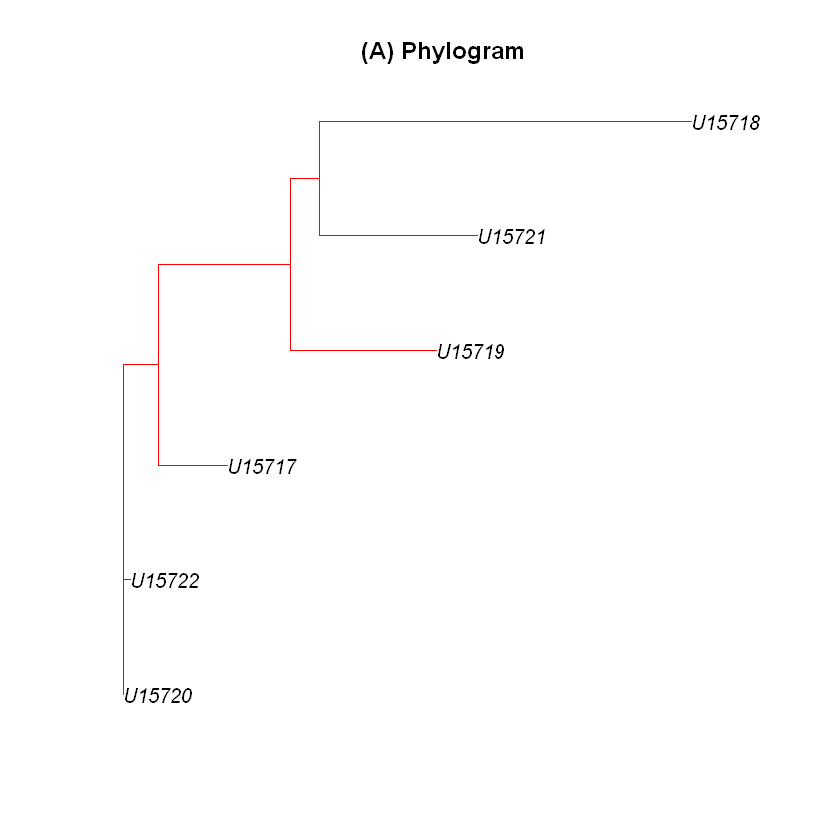

In [34]:
# there are 4 types of phylogenetic trees for nanlysis
plot(myphylo, type="phylogram", edge.color="red", cex=1, edge.width=1,main="(A) Phylogram")

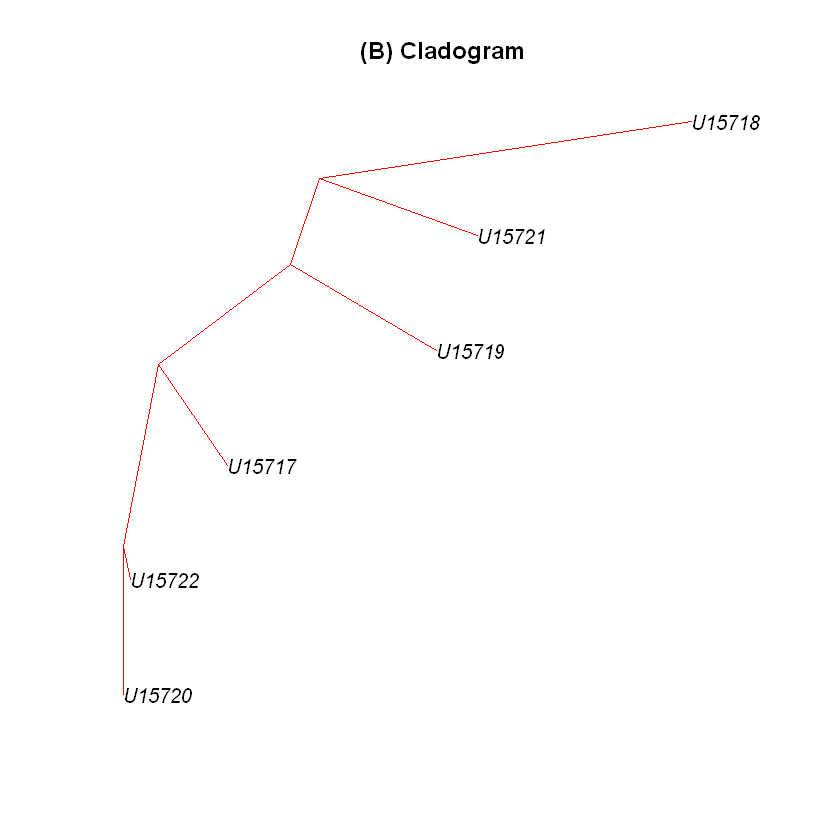

In [35]:
plot(myphylo, type="cladogram", edge.color="red", cex=1, edge.width=1, main="(B) Cladogram")

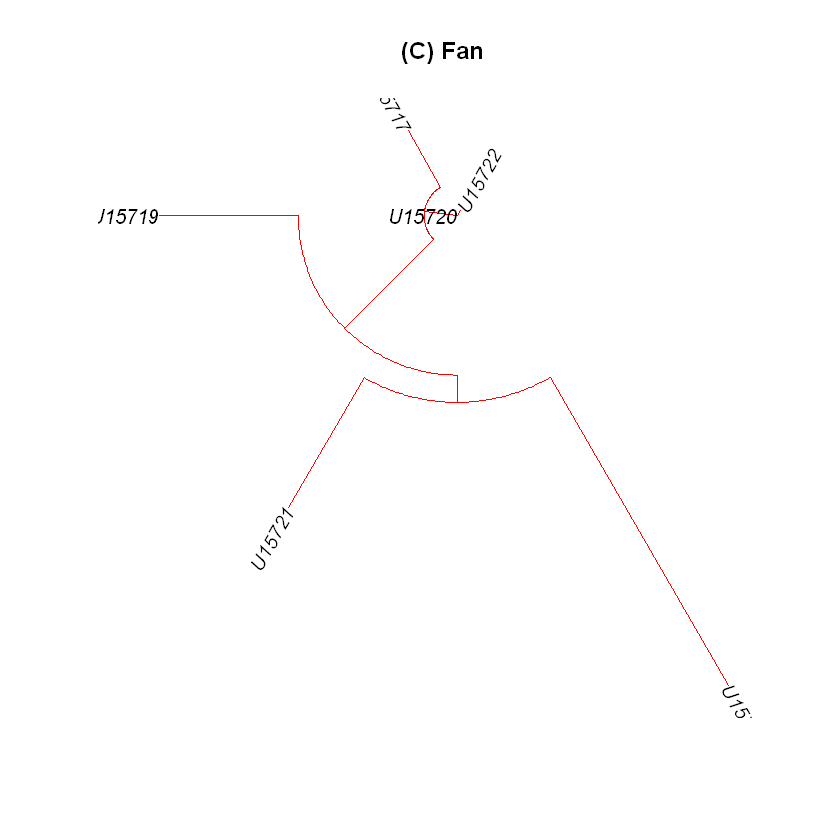

In [36]:
plot(myphylo, type="fan", edge.color="red", cex=1, edge.width=1, main="(C) Fan")

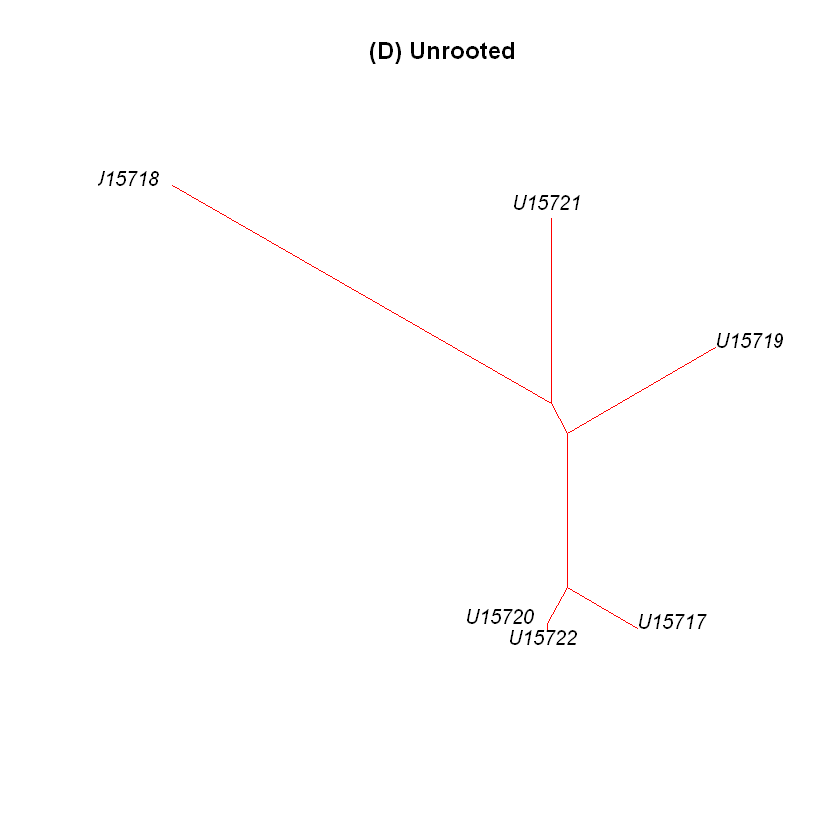

In [37]:
plot(myphylo, type="unrooted", edge.color="red", cex=1, edge.width=1, main="(D) Unrooted")

## 7. Handling BLAST results

Basic Local Alignment Search Tool (BLAST) is a basic tool to look for local similarities across sequences against a database of relevant sequences. It takes an input sequence (nucleotide or protein) and a reference database (genomic data or EST) and performs the local alignment of the former against the latter. We can understand the function and comparison of new sequences if we undertsand the relation among them. We can BLAST any of the sequences that we retrieved in the preceding sections on the [NCBI BLAST](http://blast.ncbi.nlm.nih.gov/Blast.cgi) web page.
BLAST results are usually an HTML page but can be downloaded as a table. <br>
At first, we should have a BLAST result. Input the sequence we retrieved(The input can either be made in the textbox by pasting the sequence or path to a `FASTA` file or a sequence ID). Then, we can run the `BLAST` program of our retrieved sequence to get the results. The result table can then be downloaded as a `table`. <br>
If the results are downloaded from the NCBI standalone BLAST, we can easily use the `RFLPtools` package to do DNA fragment analysis and BLAST report analysis.

In [39]:
BiocManager::install("RFLPtools"）
library(RFLPtools）                     

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'RFLPtools'



package 'RFLPtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpG4tn6l\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'

Loading required package: RColorBrewer



In [40]:
# Use the built-in blast result from the package for a demo :
DIR <- system.file("extdata", package = "RFLPtools")
MyFile <- file.path(DIR, "BLASTexample.txt")
MyFile

[1] "D:/R-3.6.2/library/RFLPtools/extdata/BLASTexample.txt"

In [41]:
# read the file,use 'read.blast':
MyBlast<- read.blast(file = MyFile)
head(MyBlast)

,query.id,subject.id,identity,alignment.length,mismatches,gap.opens,q.start,q.end,s.start,s.end,evalue,bit.score
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,agrFF002,agrFF002,100.00,544,0,0,1,544,1,544,0.0e+00,944.0
2,agrFF002,agrFF148,93.42,243,14,2,199,439,671,913,6.0e-102,360.0
3,agrFF002,agrFF148,100.00,11,0,0,462,472,785,795,6.7e+00,21.1
4,agrFF002,agrFF176,91.37,255,20,2,187,439,123,377,2.0e-100,354.0
5,agrFF002,agrFF176,100.00,11,0,0,462,472,250,260,6.7e+00,21.1
6,agrFF002,agrFF040,91.37,255,20,2,187,439,121,375,2.0e-100,354.0


If the BLAST results are from a standalone BLAST, use the RFLP library's ‘read.blast’ function, to read the MyblastRes.txt BLAST file into a data frame:
> MyBLAST <- read.blast(file="MyblastRes.txt")<br>

In case you did not use the BLAST program but used the web-based tools to get the ‘myAlign.txt’ file, you can still read the file as a data frame：<br>
> MyBLAST2 <- read.csv(file="myAlign.txt", head=TRUE, sep=",")


In [42]:
# The 'RFLPtool' package allows the computing/extracting of similar matrices out of the data frame:
mySimMat <- simMatrix(MyBlast)
head(mySimMat)

,agrFF002,agrFF003,agrFF005,agrFF023,agrFF036,agrFF040,agrFF042,agrFF043,agrFF044,agrFF049,...,agrFF185,agrFF190,agrFF191,agrFF192,agrFF200,agrFF202,agrFF203,agrFF204,agrFF206,agrFF212
agrFF002,1.0000000,0.5142857,0.3645418,0.6389497,0.6409692,0.5065217,0.5154867,0.4458078,0.5125348,0.3995680,...,0.5087336,0.3682093,0.6198704,0.5200000,0.3549696,0.3809524,0.3825364,0.2904412,0.4478528,0.3731343
agrFF003,0.5142857,1.0000000,0.3846154,0.9912088,0.9801762,0.9736264,0.9800885,0.7274725,0.6935933,0.4351648,...,0.9846154,0.3846154,0.9780220,0.9866667,0.3956044,0.4329670,0.4329670,0.3252747,0.7076923,0.4175824
agrFF005,0.3645418,0.3846154,1.0000000,0.3829322,0.3876652,0.3804348,0.3871681,0.3680982,0.5041783,0.7386609,...,0.3820961,0.9979879,0.3779698,0.3888889,0.4036511,0.7039337,0.7068607,0.2988048,0.3701431,0.4243070
agrFF023,0.6389497,0.9912088,0.3829322,1.0000000,0.9911894,0.9759300,0.9889381,0.7264770,0.8495822,0.4332604,...,0.9868709,0.3829322,0.9737418,0.9977778,0.3938731,0.4310722,0.4310722,0.3238512,0.7067834,0.4157549
agrFF036,0.6409692,0.9801762,0.3876652,0.9911894,1.0000000,0.9691630,0.9845133,0.7290749,0.8467967,0.4339207,...,0.9801762,0.3876652,0.9669604,0.9888889,0.3986784,0.4317181,0.4317181,0.3259912,0.7092511,0.4207048
agrFF040,0.5065217,0.9736264,0.3804348,0.9759300,0.9691630,1.0000000,0.9823009,0.7195652,0.8551532,0.4282609,...,0.9825328,0.3804348,0.9695652,0.9800000,0.3782609,0.4260870,0.4260870,0.3217391,0.7000000,0.4108696


In [43]:
dim(mySimMat)

[1] 62 62

In [47]:
test2 <- simMatrix(MyBlast, sequence.range=TRUE, Min=500) 
dim(test2)

[1] 14 14

In [53]:
head(MyBlast$alignment.length)　
MyBL_500 <- subset(MyBlast, MyBlast$alignment.length>=500)
id_all=union(MyBL_500$query.id,MyBL_500$subject.id)
id_all
length(id_all)　

[1] 544 243  11 255  11 255

[1] "agrFF002" "agrFF005" "agrFF050" "agrFF051" "agrFF119" "agrFF142"
 [7] "agrFF146" "agrFF147" "agrFF148" "agrFF170" "agrFF172" "agrFF177"
[13] "agrFF182" "agrFF204"

[1] 14

In [55]:
BiocManager::install("MKmisc")
library(MKmisc) 

Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Installing package(s) 'MKmisc'



package 'MKmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Master\AppData\Local\Temp\RtmpG4tn6l\downloaded_packages


Old packages: 'BH', 'bit', 'caTools', 'cli', 'fansi', 'GetoptLong', 'ggridges',
  'gplots', 'hms', 'multcomp', 'mvtnorm', 'precrec', 'prettyunits', 'pROC',
  'RCurl', 'RSQLite', 'Rttf2pt1', 'shinyjs', 'stringi', 'tinytex', 'xfun',
  'zoo'


Attaching package: 'MKmisc'


The following object is masked from 'package:Biostrings':

    stringDist




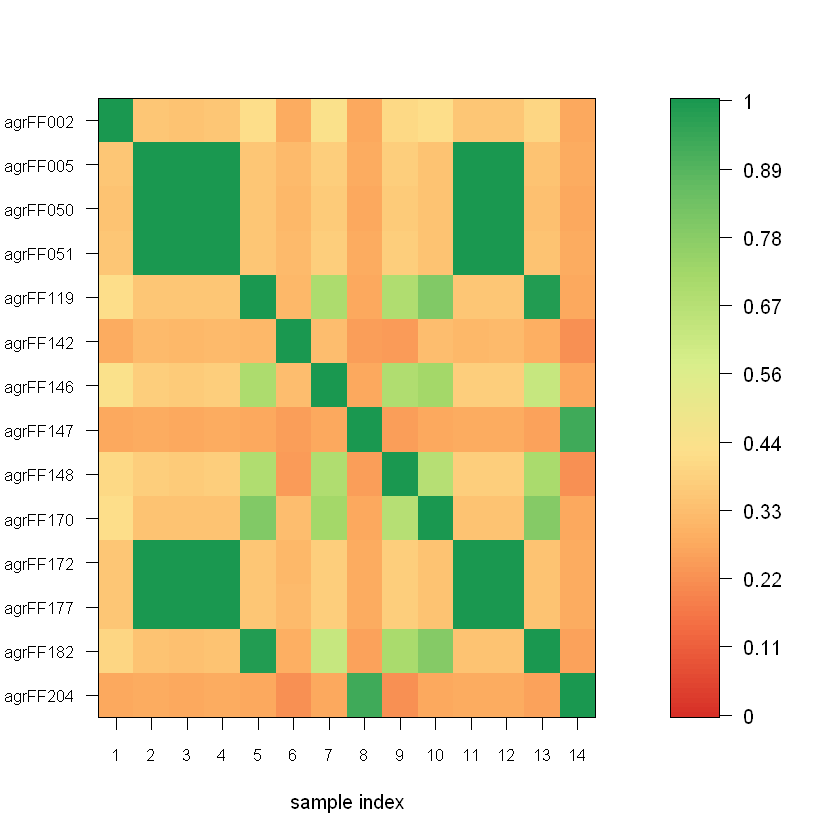

In [56]:
simPlot(test2,minVal=0,labels=colnames(test2))

## 8、Pattern finding in a sequence

Then we can name the columns of the data per your convenience and use it for further analysis like the `colnames`、`dim.names` function.

The web-based BLAST algorithm primarily outputs an `HTML` file together with some other formats. However, the alignment is available for download in a tabular format. The recipe just explains a way to import these files as a data frame. The `read.blast` functions do the same with the file generated by the standalone BLAST. For instance, such data is available as an example in the `RFLPtools` package. 

This gives us an idea about the contents of the BLAST result data. The data consists of various elements, such as the name, identity, sequence length, alignment length, E-values, and some other attributes of the BLAST search. 

In [57]:
data(BLASTdata)
head(BLASTdata)
colnames(BLASTdata)

,query.id,subject.id,identity,alignment.length,mismatches,gap.opens,q.start,q.end,s.start,s.end,evalue,bit.score
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,agrFF002,agrFF002,100.00,544,0,0,1,544,1,544,0.0e+00,944.0
2,agrFF002,agrFF148,93.42,243,14,2,199,439,671,913,6.0e-102,360.0
3,agrFF002,agrFF148,100.00,11,0,0,462,472,785,795,6.7e+00,21.1
4,agrFF002,agrFF176,91.37,255,20,2,187,439,123,377,2.0e-100,354.0
5,agrFF002,agrFF176,100.00,11,0,0,462,472,250,260,6.7e+00,21.1
6,agrFF002,agrFF040,91.37,255,20,2,187,439,121,375,2.0e-100,354.0


[1] "query.id"         "subject.id"       "identity"         "alignment.length"
 [5] "mismatches"       "gap.opens"        "q.start"          "q.end"           
 [9] "s.start"          "s.end"            "evalue"           "bit.score"

In [58]:
library(Biostrings)

In [59]:
# create the sequence to be analyzed(or we can use the sequences fetched from GenBank as well):
mynucleotide <- DNAString("aacataatgcagtagaacccatgagccc")
mynucleotide

  28-letter "DNAString" instance
seq: AACATAATGCAGTAGAACCCATGAGCCC

In [60]:
# Look for a pattern of the sequence, such as a start codon ATG:
matchPattern(DNAString("ATG"), mynucleotide)

  Views on a 28-letter DNAString subject
subject: AACATAATGCAGTAGAACCCATGAGCCC
views:
    start end width
[1]     7   9     3 [ATG]
[2]    21  23     3 [ATG]

In [61]:
# Similarly, look for the pattern for the stop codons, such as TAA or other stop codons:
matchPattern("TAA", mynucleotide)

  Views on a 28-letter DNAString subject
subject: AACATAATGCAGTAGAACCCATGAGCCC
views:
    start end width
[1]     5   7     3 [TAA]

In [62]:
# combine these two aspects into a single function to return the overall results for all the codons:
myCodonFinder <- function(sequence){
    startCodon = DNAString("ATG") # Assign start codons 
    stopCodons = list("TAA", "TAG", "TGA") # Assign stop codons
    codonPosition = list() #initialize the output to be returned as a list
    codonPosition$Start = matchPattern(startCodon, sequence) # search start codons
    x=list()
    for(i in 1:3){ # iterate over all stop codons
        x[[i]]= matchPattern(DNAString (stopCodons[[i]]), sequence)
        codonPosition$Stop=x
    }
    return(codonPosition) # returns results
}

In [54]:
table(myseq)

myseq
 A  C  G  T 
15  7  5  5 

In [55]:
myseq <-
"MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLLSVAYKNVVGARRSSWR
VISSIEQKTERNEKKQQMGKEYREKIEAELQDICNDVLELLDKYLIPNATQPESKVFYLKMK
GDYFRYLSEVASGDNKQTTVSNQQAYQEAFEISKKEMQPTHPIRLGLALNFSVFYYEILNS
PEKACSLAKTAFDEAIAELDTLNEESYKDSTLIMQLLRDNLTWTSENQGDEGENLYFQ"
myseq <- strsplit(myseq, "")
myseq <- unlist(myseq)
myseq

[1] "M"  "T"  "M"  "D"  "K"  "S"  "E"  "L"  "V"  "Q"  "K"  "A"  "K"  "L"  "A" 
 [16] "E"  "Q"  "A"  "E"  "R"  "Y"  "D"  "D"  "M"  "A"  "A"  "A"  "M"  "K"  "A" 
 [31] "V"  "T"  "E"  "Q"  "G"  "H"  "E"  "L"  "S"  "N"  "E"  "E"  "R"  "N"  "L" 
 [46] "L"  "S"  "V"  "A"  "Y"  "K"  "N"  "V"  "V"  "G"  "A"  "R"  "R"  "S"  "S" 
 [61] "W"  "R"  "\n" "V"  "I"  "S"  "S"  "I"  "E"  "Q"  "K"  "T"  "E"  "R"  "N" 
 [76] "E"  "K"  "K"  "Q"  "Q"  "M"  "G"  "K"  "E"  "Y"  "R"  "E"  "K"  "I"  "E" 
 [91] "A"  "E"  "L"  "Q"  "D"  "I"  "C"  "N"  "D"  "V"  "L"  "E"  "L"  "L"  "D" 
[106] "K"  "Y"  "L"  "I"  "P"  "N"  "A"  "T"  "Q"  "P"  "E"  "S"  "K"  "V"  "F" 
[121] "Y"  "L"  "K"  "M"  "K"  "\n" "G"  "D"  "Y"  "F"  "R"  "Y"  "L"  "S"  "E" 
[136] "V"  "A"  "S"  "G"  "D"  "N"  "K"  "Q"  "T"  "T"  "V"  "S"  "N"  "Q"  "Q" 
[151] "A"  "Y"  "Q"  "E"  "A"  "F"  "E"  "I"  "S"  "K"  "K"  "E"  "M"  "Q"  "P" 
[166] "T"  "H"  "P"  "I"  "R"  "L"  "G"  "L"  "A"  "L"  "N"  "F"  "S"  "V"  "F" 
[181] "Y"  "Y"  "E"  "I"  "L"  "N"  "S"  "\n" "P"  "E"  "K"  "A"  "C"  "S"  "L" 
[196] "A"  "K"  "T"  "A"  "F"  "D"  "E"  "A"  "I"  "A"  "E"  "L"  "D"  "T"  "L" 
[211] "N"  "E"  "E"  "S"  "Y"  "K"  "D"  "S"  "T"  "L"  "I"  "M"  "Q"  "L"  "L" 
[226] "R"  "D"  "N"  "L"  "T"  "W"  "T"  "S"  "E"  "N"  "Q"  "G"  "D"  "E"  "G" 
[241] "E"  "N"  "L"  "Y"  "F"  "Q"

In [56]:
myseq <-
"MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLLSVAYKNVVGARRSSWR
VISSIEQKTERNEKKQQMGKEYREKIEAELQDICNDVLELLDKYLIPNATQPESKVFYLKMK
GDYFRYLSEVASGDNKQTTVSNQQAYQEAFEISKKEMQPTHPIRLGLALNFSVFYYEILNS
PEKACSLAKTAFDEAIAELDTLNEESYKDSTLIMQLLRDNLTWTSENQGDEGENLYFQ"
myseq <- s2c(myseq)
myseq
# 's2c' converses a string into a vector of chars.
# such as "BigBang" into a vector of chars such as c("B", "i", "g", "B", "a", "n", "g").

[1] "M"  "T"  "M"  "D"  "K"  "S"  "E"  "L"  "V"  "Q"  "K"  "A"  "K"  "L"  "A" 
 [16] "E"  "Q"  "A"  "E"  "R"  "Y"  "D"  "D"  "M"  "A"  "A"  "A"  "M"  "K"  "A" 
 [31] "V"  "T"  "E"  "Q"  "G"  "H"  "E"  "L"  "S"  "N"  "E"  "E"  "R"  "N"  "L" 
 [46] "L"  "S"  "V"  "A"  "Y"  "K"  "N"  "V"  "V"  "G"  "A"  "R"  "R"  "S"  "S" 
 [61] "W"  "R"  "\n" "V"  "I"  "S"  "S"  "I"  "E"  "Q"  "K"  "T"  "E"  "R"  "N" 
 [76] "E"  "K"  "K"  "Q"  "Q"  "M"  "G"  "K"  "E"  "Y"  "R"  "E"  "K"  "I"  "E" 
 [91] "A"  "E"  "L"  "Q"  "D"  "I"  "C"  "N"  "D"  "V"  "L"  "E"  "L"  "L"  "D" 
[106] "K"  "Y"  "L"  "I"  "P"  "N"  "A"  "T"  "Q"  "P"  "E"  "S"  "K"  "V"  "F" 
[121] "Y"  "L"  "K"  "M"  "K"  "\n" "G"  "D"  "Y"  "F"  "R"  "Y"  "L"  "S"  "E" 
[136] "V"  "A"  "S"  "G"  "D"  "N"  "K"  "Q"  "T"  "T"  "V"  "S"  "N"  "Q"  "Q" 
[151] "A"  "Y"  "Q"  "E"  "A"  "F"  "E"  "I"  "S"  "K"  "K"  "E"  "M"  "Q"  "P" 
[166] "T"  "H"  "P"  "I"  "R"  "L"  "G"  "L"  "A"  "L"  "N"  "F"  "S"  "V"  "F" 
[181] "Y"  "Y"  "E"  "I"  "L"  "N"  "S"  "\n" "P"  "E"  "K"  "A"  "C"  "S"  "L" 
[196] "A"  "K"  "T"  "A"  "F"  "D"  "E"  "A"  "I"  "A"  "E"  "L"  "D"  "T"  "L" 
[211] "N"  "E"  "E"  "S"  "Y"  "K"  "D"  "S"  "T"  "L"  "I"  "M"  "Q"  "L"  "L" 
[226] "R"  "D"  "N"  "L"  "T"  "W"  "T"  "S"  "E"  "N"  "Q"  "G"  "D"  "E"  "G" 
[241] "E"  "N"  "L"  "Y"  "F"  "Q"

In [57]:
table(myseq)

myseq
\n  A  C  D  E  F  G  H  I  K  L  M  N  P  Q  R  S  T  V  W  Y 
 3 20  2 13 29  7  8  2 10 20 24  8 14  5 16 10 18 12 11  2 12 

In [59]:
library(graphics)

In [60]:
Actinobacteria= GC(myActino)
Actinobacteria

[1] 0.6666667

In [61]:
Proteobacteria=GC(myProteo)
Proteobacteria

[1] 0.5253227

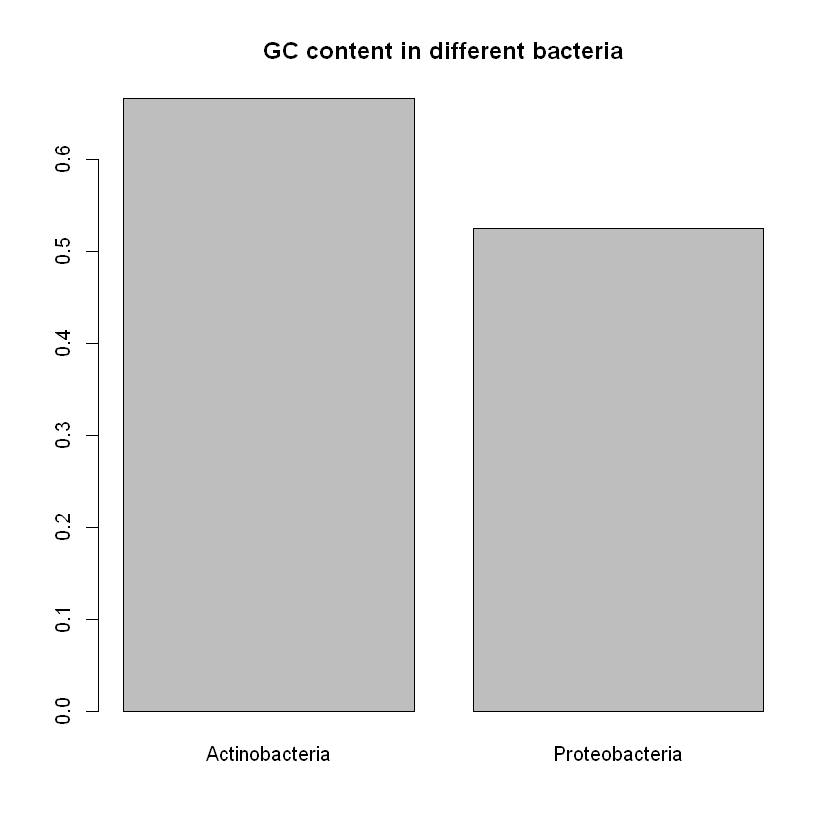

In [70]:
barplot(c(Actinobacteria= GC(myActino),
        Proteobacteria = GC(myProteo)), 
        main="GC content in different bacteria")

In [69]:
seqinr::count(myActino, wordsize=2)


aa ac ag at ca cc cg ct ga gc gg gt ta tc tg tt 
16 30 19 16 27 41 57 14 35 39 49 27  2 29 26  7 

The GC function of `seqinr` uses a similar method, but as an extension, it computes the fraction of `G` and `C` in the nucleotide. We can do this manually using the values of `C (index 2)` and `G (index 3)` as follows:

In [68]:
myGC <- sum(table(myseq)[2], table(myseq)[3])/sum(table(myseq))
myGC

[1] 0.08943089